## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 




## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### We will make this model by going through 5 important steps:
- Step 1: Reading and Understanding the Data
- Step 2 : Visualising the data 
- Step 3 : Preparing the data for Modelling
- Step 4 : Splitting the data into Training and Test data 
- Step 5 : Residual Analysis
- Step 6 : Predictions and Evaluations on the Test Data

### Step 1: Reading and Understanding the Data
#### Let us first import the required libraries for this assignment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### -  As we can observe that the date column , instant are not very helpful for us because they do not have direct relation with the target variable "cnt' , so drop it . 
#### - Two other columns : 'casual' and 'registered' also need to be dropped as they are directly a part of 'cnt' column and our test data will most probably do not have these two columns so there can be great disparity between training data result and test data result if we keep them

In [6]:
bike.drop(['instant','dteday','atemp','casual','registered'], axis=1, inplace=True)

In [7]:
bike.shape

(730, 11)

#### so now we observe that we have 730 rows and 11 columns , now we will classify our columns into category columns and numeric columns 

In [8]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
# Create a list of numeric variables 
numeric_vars = ['temp','hum','windspeed','cnt']
# convert dtype of categorical variables
bike[cat_vars] = bike[cat_vars].astype('category')

In [9]:
bike.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [10]:
# get the insights of categorical variables
bike.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,1,12,0,2,1,1
freq,188,365,62,709,105,504,463


#### Now we will map the categorical variables to their proper names as follows:
- season from 1,2,3,4 to spring, summer , fall , winter.
- mnth from 1,2,3 ....12 to Jan, Feb .... Dec 
- Weekday from 0,1,2....6 to Sun , Mon .... Sat
- Weathersit from 1,2...4 to Clear , Mist + Cloudy ,... Heavy Rain 

In [11]:
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday'] = bike['weekday'].map({1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',0:'Sun'})
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Ice Pallets'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.3 KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

## Univariate Analysis 

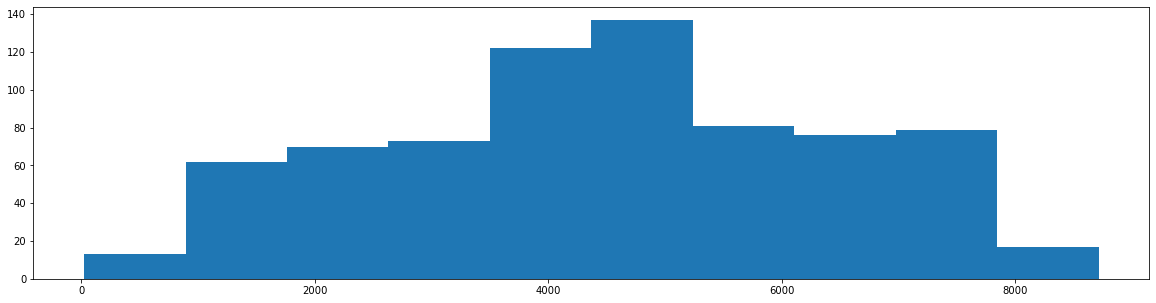

In [13]:
# visualise the pattern of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,5))
plt.hist(bike.cnt)
plt.show()

#### We can observe that there was growth over the period and recently we could see there is reduction in demand

### Visulalising Categorical Variables using pie chart

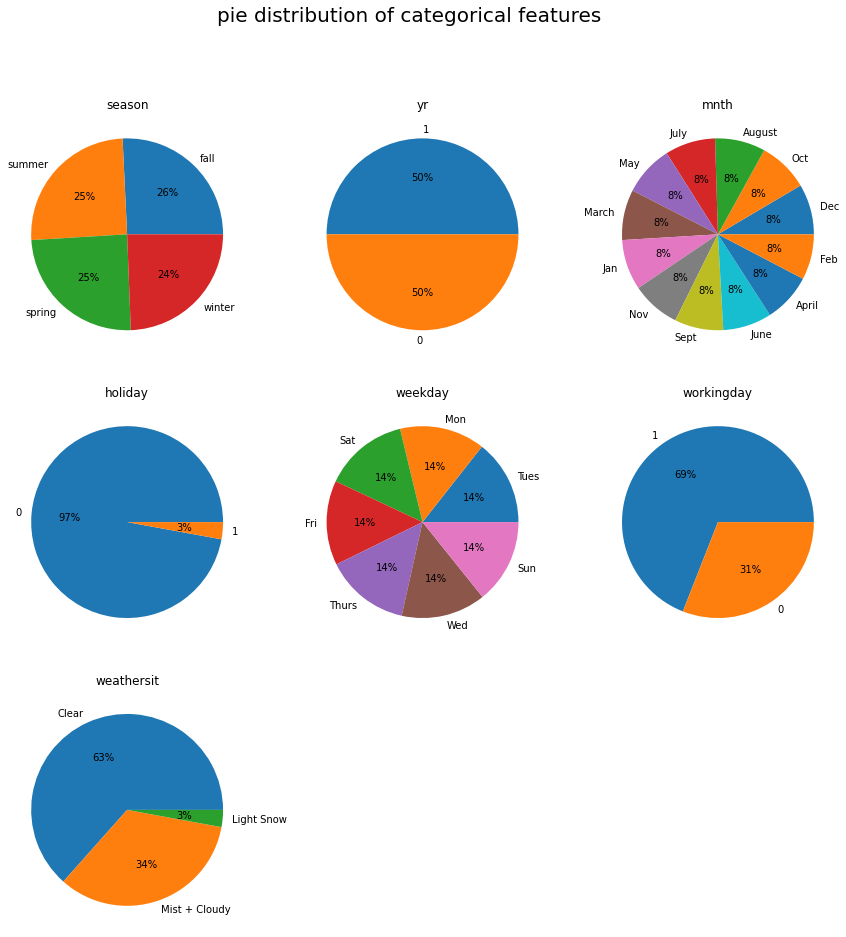

In [14]:


bike_piplot=bike.select_dtypes(include='category')
plt.figure(figsize=(15,15))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,bike_piplot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(bike_piplot.columns.values[i-1])
    values=bike_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=bike_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
# plt.tight_layout(pad = 0.5)
plt.show()

#### - Seasons: We could see business was operating similar days in all four seasons.
#### - Yr: Number of days operation in both the year are almost same.
#### - Month: We could see business was operating similar days in all 12 months.
#### - Holiday: Business was operating in 3% days of holiday
#### - weekdays: We could see business was operating similar percentage in all weekdays.
#### - Workingday: Business was operating in 68% in working days and 32% in nonworking days.
####  - Weathersit: From the above analaysis it is being observed that there is no data for 4th category of weathersit  Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.May be the company is not operating on those days or there was no demand of bike.

## Bi-Variate analysis

#### Analysing  the numerical columns 

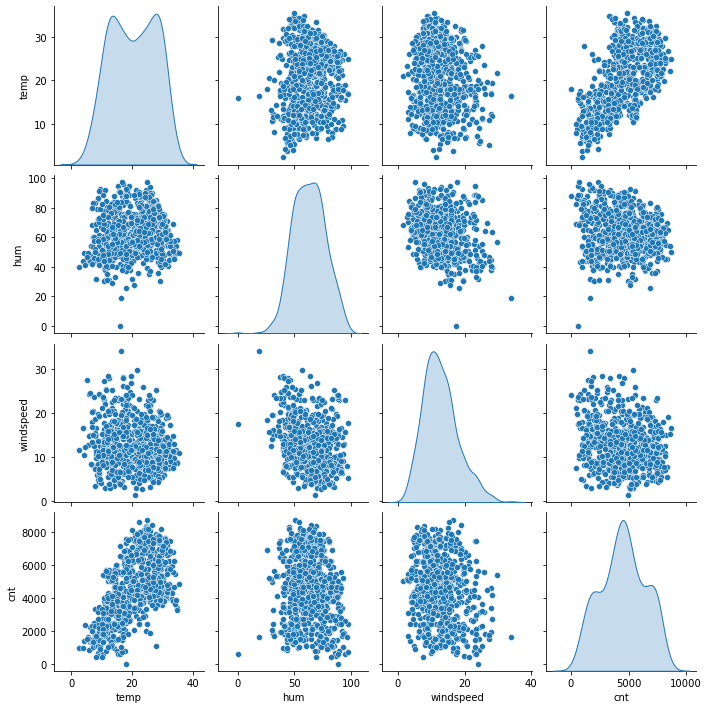

In [15]:
# pairplot for continuous data type
sns.pairplot(bike.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

#### From the above pairplot we could observe that, temp has highest positive correlation with target variable cnt.

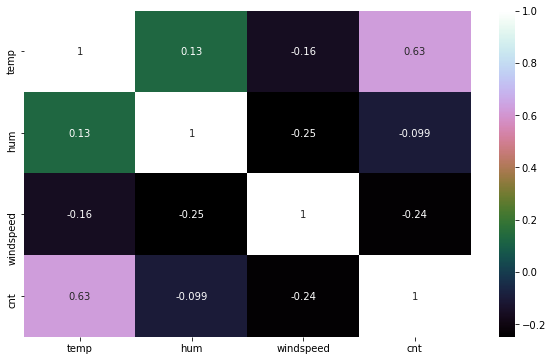

In [16]:
# look at the correaltion between continous varibales using heat map
plt.figure(figsize = (10,6))
sns.heatmap(bike.corr(), annot=True, cmap='cubehelix')
plt.show()

    A positive correalation observed between cnt and temp (0.63)
    A Negative correlation observed for cnt with hum , windspeed (-0.099 ,-0.24)

#### Analysing the correlation of category variables with the target variable : 'cnt' using  boxplots

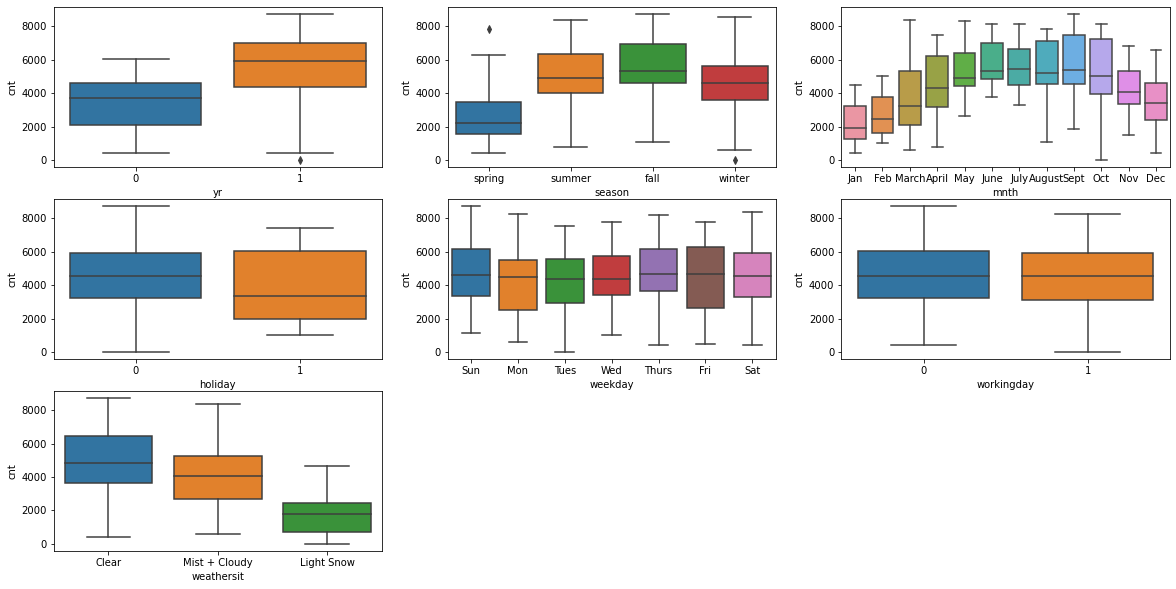

In [17]:
plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

- 	The demad of bike is less in the month of spring when compared with other seasons and it goes highest in the Fall season
-	The demand bike increased in the year 2019 when compared with year 2018.
-	Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
-	Bike demand is less in holidays in comparison to not being holiday.
-	The demand of bike is almost similar throughout the weekdays.
-	There is no significant change in bike demand with workign day and non working day.
-	The bike demand is high when weather is clear and Few clouds however demand is less in case of Lightsnow and light rainfall. We do not have any dat for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog , so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.


## Step 3 : Preparing the data for Modelling

### Creating Dummy variables Categorical variables like Season , weekday ,mnth, weathersit

In [18]:
status = pd.get_dummies(bike[['season','weekday','mnth','weathersit']],drop_first=True)


In [19]:
# concat the dummy status with original bike 
bike = pd.concat([bike,status], axis = 1)

# drop season column
bike.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   yr                        730 non-null    category
 1   holiday                   730 non-null    category
 2   workingday                730 non-null    category
 3   temp                      730 non-null    float64 
 4   hum                       730 non-null    float64 
 5   windspeed                 730 non-null    float64 
 6   cnt                       730 non-null    int64   
 7   season_summer             730 non-null    uint8   
 8   season_fall               730 non-null    uint8   
 9   season_winter             730 non-null    uint8   
 10  weekday_Mon               730 non-null    uint8   
 11  weekday_Tues              730 non-null    uint8   
 12  weekday_Wed               730 non-null    uint8   
 13  weekday_Thurs             730 non-null    uint8   

##### Convert categorical columns binary variables  to numeric 

In [21]:

bike[['yr','holiday','workingday']]= bike[['yr','holiday','workingday']].astype('int64')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   cnt                       730 non-null    int64  
 7   season_summer             730 non-null    uint8  
 8   season_fall               730 non-null    uint8  
 9   season_winter             730 non-null    uint8  
 10  weekday_Mon               730 non-null    uint8  
 11  weekday_Tues              730 non-null    uint8  
 12  weekday_Wed               730 non-null    uint8  
 13  weekday_Thurs             730 non-null    uint8  
 14  weekday_Fr

## Step 4 :  Train-Test Split
We now need to split our variable into training and testing sets. We'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [22]:
df_train , df_test = train_test_split(bike,train_size= 0.7,random_state = 100)

In [23]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [24]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,29.246653,70.4167,11.083475,7216,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,1683,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling of data set


- During EDA we could observe that there is different range of data in the data set.This can be easily observed by looking at the numrical columns  So it becomes important to scale the data.
- Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset

In [25]:
#Instantiate an object
scaler = MinMaxScaler()
# Fit on data
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# To confirm that all the numeric variable have been mapped we can do 
df_train[numeric_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [27]:
y_train = df_train.pop('cnt')
x_train = df_train

In [28]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### By using RFE first we will select 15 most suitable columns from our file so then fine tune them manually 

In [31]:

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [32]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 7),
 ('weekday_Thurs', False, 5),
 ('weekday_Fri', False, 6),
 ('weekday_Sat', False, 14),
 ('mnth_Feb', False, 10),
 ('mnth_March', True, 1),
 ('mnth_April', False, 3),
 ('mnth_May', True, 1),
 ('mnth_June', False, 2),
 ('mnth_July', False, 11),
 ('mnth_August', True, 1),
 ('mnth_Sept', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 12),
 ('mnth_Dec', False, 13),
 ('weathersit_Mist + Cloudy', True, 1),
 ('weathersit_Light Snow', True, 1)]

In [33]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_March', 'mnth_May', 'mnth_August',
       'mnth_Sept', 'mnth_Oct', 'weathersit_Mist + Cloudy',
       'weathersit_Light Snow'],
      dtype='object')

In [34]:
x_train.columns[~rfe.support_]

Index(['workingday', 'weekday_Mon', 'weekday_Tues', 'weekday_Wed',
       'weekday_Thurs', 'weekday_Fri', 'weekday_Sat', 'mnth_Feb', 'mnth_April',
       'mnth_June', 'mnth_July', 'mnth_Nov', 'mnth_Dec'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [36]:
 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [37]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [38]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.00e-188
Time:                        19:51:59   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### This is our first training model , now we will remove first those variables whose p value come more than 0.05 as we know by hypthesis testing that any variable having p value more than 0.05 is not really significant to the model and so can be dropped. 

#### ALso the variables have to be removed one by one so we first remove the mnt_May 

In [39]:
x_train_new = x_train_rfe.drop(['mnth_May'], axis=1)
lm = sm.OLS(y_train,x_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.46e-189
Time:                        19:51:59   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Now season_fall is dropped

In [40]:
x_train_new1 = x_train_new.drop(['season_fall'], axis=1)
lm = sm.OLS(y_train,x_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.94e-190
Time:                        19:52:00   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### now we remove the column 'mnth_March'

In [41]:
x_train_new2 = x_train_new1.drop(['mnth_March'], axis=1)
lm = sm.OLS(y_train,x_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.49e-190
Time:                        19:52:00   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### now we see that the column 'mnth_Oct' has a p value of 0.04 which is less than 0.05 but as we need to keep the columns under 10 , we remove it and then see the change in the  value of R square and Adjusted R square, if it do not change much then the mnth_Oct can be dropped.

In [42]:
x_train_new3 = x_train_new2.drop(['mnth_Oct'], axis=1)
lm = sm.OLS(y_train,x_train_new3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.50e-191
Time:                        19:52:00   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### So we see that there is almost no change in the value of R square and adjusted R square after dropping all the above variables which mean the model is better now , but even now we have 11 dependent variables  and no variable has a high p value so now we will look at the VIF values and see if we can eliminate one more variable

### Checking VIF
    Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

    𝑉𝐼𝐹𝑖 = [1/(1−𝑅𝑖2)]

#### If   VIF value of any variable is more than 5,  it mean its R square is more than 0.8 , It means 80 percent of this variable  has been explained by other variables , so we can drop this variable

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.17
4,hum,1.86
10,weathersit_Mist + Cloudy,1.55
3,temp,1.54
8,mnth_August,1.44
6,season_summer,1.37
7,season_winter,1.32
11,weathersit_Light Snow,1.23
9,mnth_Sept,1.21
5,windspeed,1.18


#### Here we see that the VIF of the constant has a value 45.17 which is a very high value but we should also remember that the contant is not any dependent variable so we cannot drop it . 
#### Now we will drop the next highest VIF value variable 'hum' and see if our model is equally good 

In [44]:
x_train_final = x_train_new3.drop(['hum'], axis=1)
lm = sm.OLS(y_train,x_train_final).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.62e-187
Time:                        19:52:01   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### As we saw that there is not much of a change is the value of R square and adjusted R square so we can say that our model is equally good even dropping the variable 'hum'

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_final
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.62
3,temp,1.47
7,mnth_August,1.44
5,season_summer,1.37
6,season_winter,1.27
8,mnth_Sept,1.20
4,windspeed,1.09
9,weathersit_Mist + Cloudy,1.05
10,weathersit_Light Snow,1.05
1,yr,1.02


## So now we have all the variables which are significant (p value < 0.05 and VIF <5 ), so now we will build our model

## Step - 5 (Residual Analysis)

In [46]:
y_train_pred = lm.predict(x_train_final)
y_train_pred

576    0.745375
426    0.472785
728    0.390812
482    0.559839
111    0.272671
         ...   
578    0.836373
53     0.218870
350    0.250438
79     0.310824
520    0.640045
Length: 510, dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

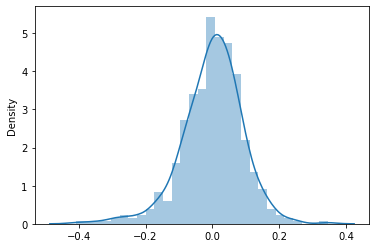

In [47]:
res = y_train - y_train_pred # res are the residual values between real y and the predicted y 
sns.distplot(res)
plt.show()

#### Here we see that the residual terms follow a normal distribution ,meaning that the difference between the actual y values of our model and the predicted values follow a normal distribution which is a good sign 

## Step 6 : Predictions and Evaluations on the Test data 

##### Now we will frame our Test data set using the same columns as were present in our final training model data set 

In [48]:
lm.params.index

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_August', 'mnth_Sept', 'weathersit_Mist + Cloudy',
       'weathersit_Light Snow'],
      dtype='object')

In [49]:
var_final = list(lm.params.index)


In [50]:
numeric_vars = ['temp','hum','windspeed','cnt']
# Fit on data
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,1,0,0,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = df_test.pop('cnt')
x_test = df_test

In [53]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [54]:
## add a constant 
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_May,mnth_June,mnth_July,mnth_August,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist + Cloudy,weathersit_Light Snow
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
x_test_sm = x_test_sm[var_final]

In [56]:
x_test_sm

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_August,mnth_Sept,weathersit_Mist + Cloudy,weathersit_Light Snow
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,1,0,0,0,0
127,1.0,0,0,0.584649,0.069510,1,0,0,0,0,0
640,1.0,1,0,0.745598,0.052115,0,1,0,0,1,0
72,1.0,0,0,0.331557,0.203418,0,0,0,0,0,0


In [57]:
y_test_pred = lm.predict(x_test_sm)

In [58]:
y_test_pred

184    0.370711
535    0.907790
299    0.401497
221    0.590123
152    0.574274
         ...   
702    0.726566
127    0.523993
640    0.797159
72     0.271795
653    0.719127
Length: 220, dtype: float64

### Get R-Square for test dataset

In [59]:

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.794


### Adj. R-Squared for test dataset

In [60]:

N= len(x_test_sm)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.783


#### Now we can observe that :
- The value of R square for training data set and test data set is 0.834 and 0.794
- The value of adjusted R square for training data set and test data set is 0.831 and 0.783

### These values are well between the acceptable difference limit of 0.05 , This signifies that our Model is very well explanatory for all the variables

Text(0, 0.5, 'y_pred')

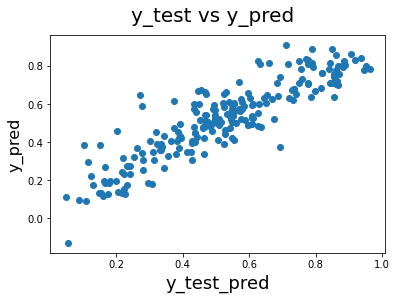

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test_pred', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### So we observe that Y_test_pred and Y_test show a strong correlation which signifies that our model is Good 

## We can see that the equation of our best fitted line is:

### cnt =(0.2326) × yr + (0.5173)×temp + (0.1012) × season_summer + (0.1371) × season_winter  + (0.0541) × mnth_August + (0.1163) × mnth_Sept+ (-0.0966) × holiday + (-0.1497) × windspeed +(-0.0811) × weathersit_Mist + Cloudy +  (-0.2819) × weathersit_Light Snow 

### So now looking at the equation we can predict that :
- as the temp increases to a comfortable value the count of users increase 
- the count of users increase more in summers as compared to winters 
- holiday has the negative impact so when there is a holiday the count of users drop 
- windspeed also has a negative impact 
- the month August and September are more significant 
- when ever the weather is Mist + Cloudy or Light snow count of riders decrease